In [3]:
import pandas as pd
import matplotlib.pyplot as plt

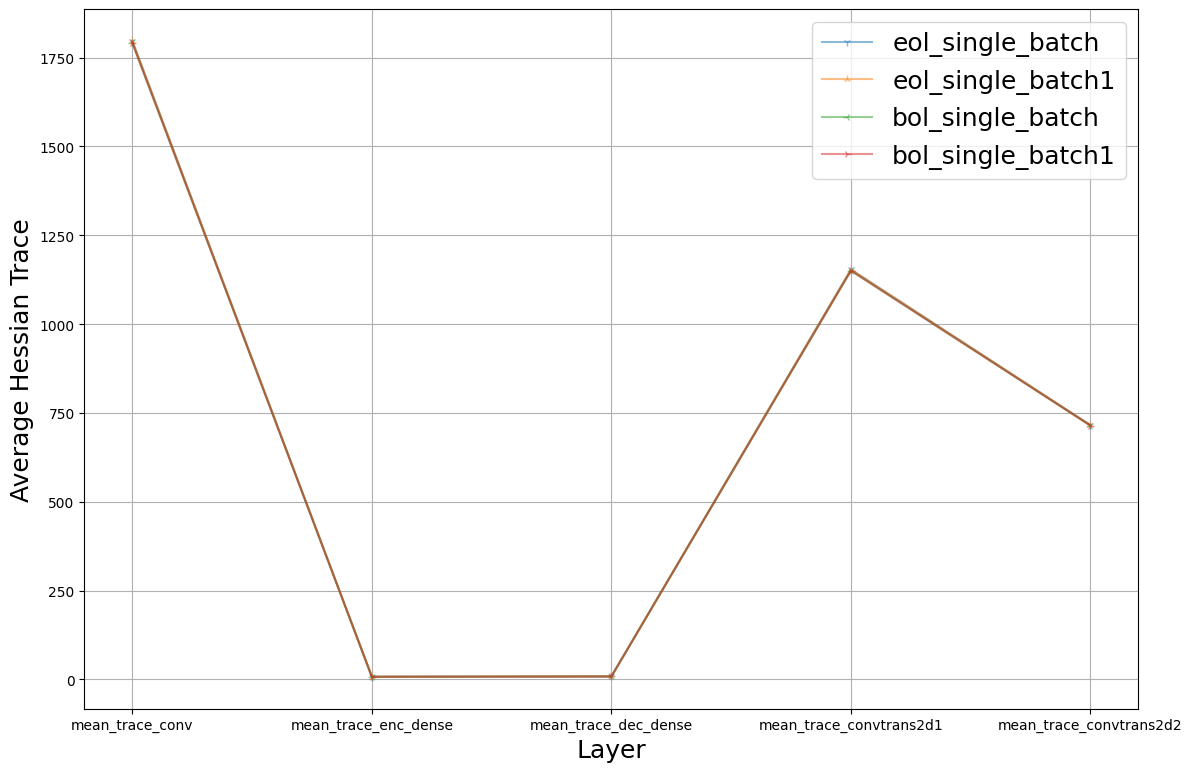

In [4]:
"""
Autoencoder PyHessian single batch
"""

df = pd.read_csv("./logs/autoencoder_mean_hessian_trace.csv")
fig, axs = plt.subplots(1, figsize=(12, 8))
fig.tight_layout()

for i in range(len(df.index)):
    mean_traces = []
    for layer in df.columns[1:]:
        mean_traces.append(df.iloc[i][layer])
    axs.plot(mean_traces, marker=str(i+1), label=df.iloc[i]["model"], alpha=0.5)

plt.xlabel("Layer", fontsize=18)
plt.ylabel("Average Hessian Trace", fontsize=18)
plt.xticks(list(range(len(df.columns[1:]))), df.columns[1:])
plt.grid()
plt.legend(fontsize=18)
# plt.yscale("log")
# plt.subplots_adjust(wspace=5, hspace=5)
plt.subplots_adjust(left=0.1, bottom=0.1)
plt.savefig("plots/autoencoder-pyhessian-single-batch.pdf")